# Tetrahymena BleTIES predictions comparison

Compare BleTIES predictions from PacBio and Nanopore data, for benchmarking of BleTIES on real-world data.

Both were run in 'subreads' mode with BleTIES MILRAA v0.1.9.

Aims:

 * Compare IES predictions from PacBio vs. Nanopore
   * Coordinates of prediction
   * Sequence identity between PacBio and Nanopore
 * Compare IES predictions vs. previously curated sequences from published MIC genome

In [1]:
from Bio import SeqIO
from Bio import pairwise2
import re
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pybedtools as pbt
import math
import numpy as np
import datetime
import glob

from collections import defaultdict

In [2]:
# Import data
# -----------
# IES annotations
pb = pbt.BedTool("tthe_pb_clr.milraa_subreads.comb.milraa_ies.gff3")
ont = pbt.BedTool("tthe_ont.milraa_subreads.comb.milraa_ies.gff3")
# IES sequences predicted by BleTIES
pb_seq = SeqIO.to_dict(SeqIO.parse("tthe_pb_clr.milraa_subreads.comb.milraa_ies.fasta", "fasta"))
ont_seq = SeqIO.to_dict(SeqIO.parse("tthe_ont.milraa_subreads.comb.milraa_ies.fasta", "fasta"))
# Reference MAC genome and annotation
mac_ref = SeqIO.to_dict(SeqIO.parse("ref/1-upd-Genome-assembly.fasta", "fasta"))
mac_gff = pbt.BedTool("ref/2-upd-Genome-GFF3-latest-2.gff3")

In [3]:
pb[0].attrs

{'ID': 'BREAK_POINTS_SUBREADS_chr_001_7588_2410',
 'IES_length': '2410',
 'IES_subread_coverage': '71',
 'IES_zmw_coverage': '71',
 'average_subread_coverage': '144',
 'average_zmw_coverage': '144'}

In [4]:
# IES stats from BleTIES predictions
# ----------------------------------
# IESs from PacBio
pb_stats = []
for i in pb:
    pb_stats.append({'id' : i.name,
                     'score' : float(i.score),
                     'len' : int(i.attrs['IES_length']),
                     'iescov' : int(i.attrs['IES_subread_coverage'])})
# IESs from Nanopore
ont_stats = []
for i in ont:
    ont_stats.append({'id' : i.name,
                      'score' : float(i.score),
                      'len' : int(i.attrs['IES_length']),
                      'iescov' : int(i.attrs['IES_subread_coverage'])})

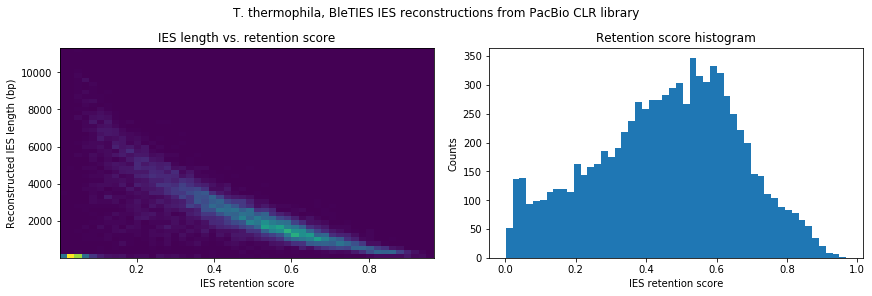

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True)

fig.suptitle("T. thermophila, BleTIES IES reconstructions from PacBio CLR library")

axs[0].hist2d(pd.DataFrame(pb_stats)['score'],
              pd.DataFrame(pb_stats)['len'], bins=50)
axs[0].set_title("IES length vs. retention score")
axs[0].set_xlabel("IES retention score")
axs[0].set_ylabel("Reconstructed IES length (bp)")


axs[1].hist(pd.DataFrame(pb_stats)['score'], bins=50)
axs[1].set_title("Retention score histogram")
axs[1].set_xlabel("IES retention score")
axs[1].set_ylabel("Counts")

plt.savefig("plots/tthe_milraa_pb_ies_retention_scores.pdf")
plt.savefig("plots/tthe_milraa_pb_ies_retention_scores.png")

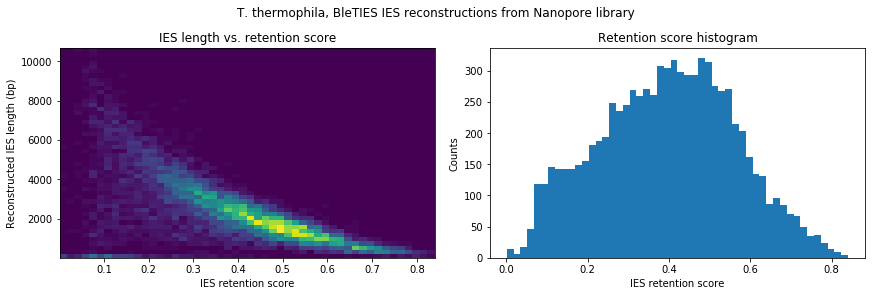

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True)

fig.suptitle("T. thermophila, BleTIES IES reconstructions from Nanopore library")

axs[0].hist2d(pd.DataFrame(ont_stats)['score'],
              pd.DataFrame(ont_stats)['len'], bins=50)
axs[0].set_title("IES length vs. retention score")
axs[0].set_xlabel("IES retention score")
axs[0].set_ylabel("Reconstructed IES length (bp)")


axs[1].hist(pd.DataFrame(ont_stats)['score'], bins=50)
axs[1].set_title("Retention score histogram")
axs[1].set_xlabel("IES retention score")
axs[1].set_ylabel("Counts")

plt.savefig("plots/tthe_milraa_ont_ies_retention_scores.pdf")
plt.savefig("plots/tthe_milraa_ont_ies_retention_scores.png")

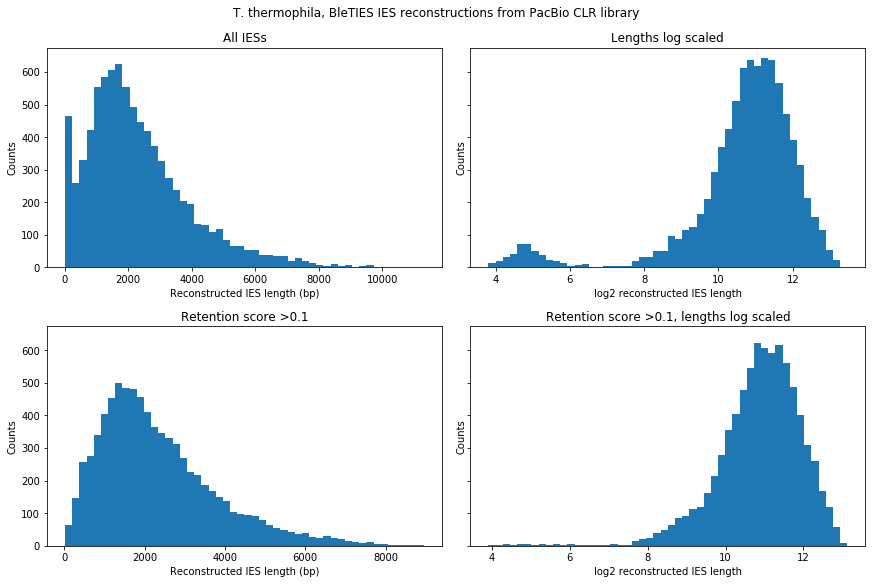

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12,8), constrained_layout=True, sharey=True)

fig.suptitle("T. thermophila, BleTIES IES reconstructions from PacBio CLR library")

axs[0][0].hist(pd.DataFrame(pb_stats)['len'], bins=50)
axs[0][0].set_title("All IESs")
axs[0][0].set_xlabel("Reconstructed IES length (bp)")
axs[0][0].set_ylabel("Counts")

axs[0][1].hist([math.log2(i) for i in pd.DataFrame(pb_stats)['len']], bins=50)
axs[0][1].set_title("Lengths log scaled")
axs[0][1].set_xlabel("log2 reconstructed IES length")
axs[0][1].set_ylabel("Counts")

axs[1][0].hist(pd.DataFrame(pb_stats).query('score>0.1')['len'], bins=50)
axs[1][0].set_title("Retention score >0.1")
axs[1][0].set_xlabel("Reconstructed IES length (bp)")
axs[1][0].set_ylabel("Counts")

axs[1][1].hist([math.log2(i) for i in pd.DataFrame(pb_stats).query('score>0.1')['len']], bins=50)
axs[1][1].set_title("Retention score >0.1, lengths log scaled")
axs[1][1].set_xlabel("log2 reconstructed IES length")
axs[1][1].set_ylabel("Counts")

plt.savefig("plots/tthe_milraa_pb_ies_len_histograms.pdf")
plt.savefig("plots/tthe_milraa_pb_ies_len_histograms.png")

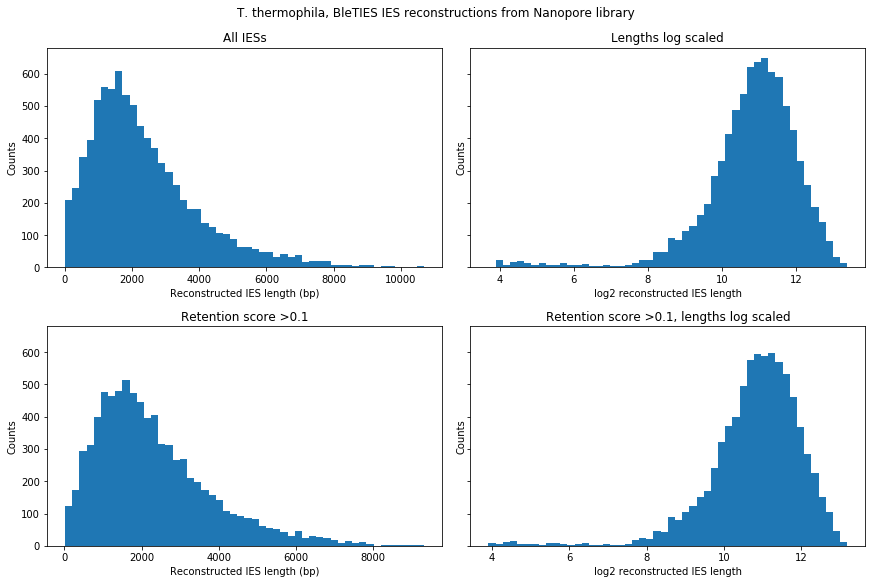

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12,8), constrained_layout=True, sharey=True)

fig.suptitle("T. thermophila, BleTIES IES reconstructions from Nanopore library")

axs[0][0].hist(pd.DataFrame(ont_stats)['len'], bins=50)
axs[0][0].set_title("All IESs")
axs[0][0].set_xlabel("Reconstructed IES length (bp)")
axs[0][0].set_ylabel("Counts")

axs[0][1].hist([math.log2(i) for i in pd.DataFrame(ont_stats)['len']], bins=50)
axs[0][1].set_title("Lengths log scaled")
axs[0][1].set_xlabel("log2 reconstructed IES length")
axs[0][1].set_ylabel("Counts")

axs[1][0].hist(pd.DataFrame(ont_stats).query('score>0.1')['len'], bins=50)
axs[1][0].set_title("Retention score >0.1")
axs[1][0].set_xlabel("Reconstructed IES length (bp)")
axs[1][0].set_ylabel("Counts")

axs[1][1].hist([math.log2(i) for i in pd.DataFrame(ont_stats).query('score>0.1')['len']], bins=50)
axs[1][1].set_title("Retention score >0.1, lengths log scaled")
axs[1][1].set_xlabel("log2 reconstructed IES length")
axs[1][1].set_ylabel("Counts")

plt.savefig("plots/tthe_milraa_ont_ies_len_histograms.pdf")
plt.savefig("plots/tthe_milraa_ont_ies_len_histograms.png")

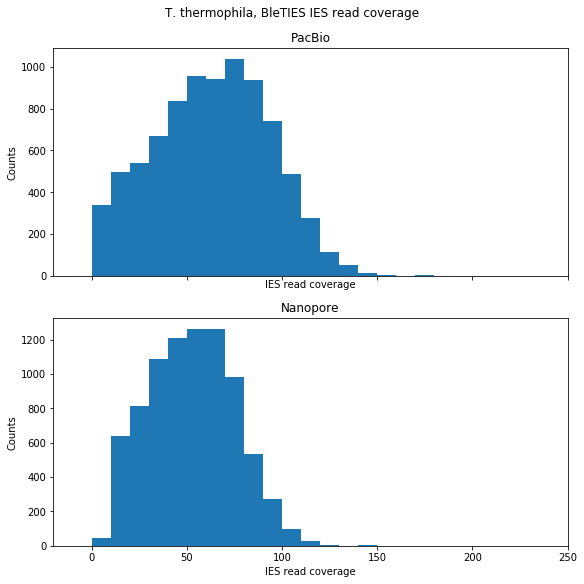

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(8,8), constrained_layout=True, sharex=True)

fig.suptitle("T. thermophila, BleTIES IES read coverage")

axs[0].hist(pd.DataFrame(pb_stats)['iescov'], bins=[i*10 for i in range(140)])
axs[0].set_title("PacBio")
axs[0].set_xlabel("IES read coverage")
axs[0].set_ylabel("Counts")
axs[0].set_xlim(-20,250)

axs[1].hist(pd.DataFrame(ont_stats)['iescov'], bins=[i*10 for i in range(140)])
axs[1].set_title("Nanopore")
axs[1].set_xlabel("IES read coverage")
axs[1].set_ylabel("Counts")

plt.savefig("plots/tthe_milraa_ies_readcov.pdf")
plt.savefig("plots/tthe_milraa_ies_readcov.png")

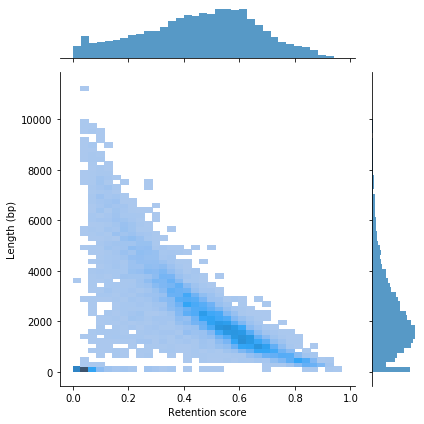

In [10]:
# Joint plot for PacBio IESs length vs. retention score
g = sns.JointGrid(
    data=pd.DataFrame(pb_stats),
    x='score', y='len')
g.plot_joint(sns.histplot)
g.plot_marginals(sns.histplot, linewidth=0)
g.set_axis_labels(xlabel="Retention score", ylabel="Length (bp)")
g.fig.tight_layout()
plt.savefig("plots/tthe_milraa_pb_ies_len_score_jointplot.png")
plt.savefig("plots/tthe_milraa_pb_ies_len_score_jointplot.pdf")

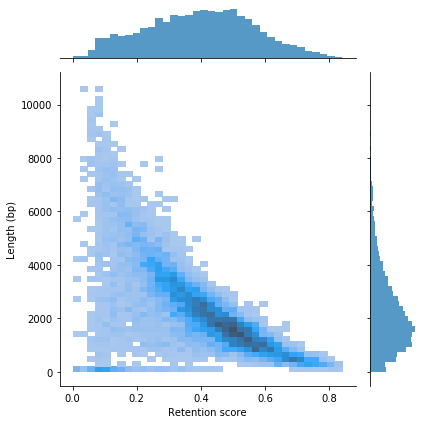

In [11]:
# Joint plot for Nanopore IESs length vs. retention score
g = sns.JointGrid(
    data=pd.DataFrame(ont_stats),
    x='score', y='len')
g.plot_joint(sns.histplot)
g.plot_marginals(sns.histplot, linewidth=0)
g.set_axis_labels(xlabel="Retention score", ylabel="Length (bp)")
g.fig.tight_layout()
plt.savefig("plots/tthe_milraa_ont_ies_len_score_jointplot.png")
plt.savefig("plots/tthe_milraa_ont_ies_len_score_jointplot.pdf")

In [12]:
# Quantile summary for MILRAA IES scores and lengths
# (not filtered)
quants = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1]
pd.DataFrame(
    zip(quants, 
        np.quantile(pd.DataFrame(pb_stats)['score'],q=quants),
        np.quantile(pd.DataFrame(ont_stats)['score'],q=quants),
        np.quantile(pd.DataFrame(pb_stats)['len'],q=quants),
        np.quantile(pd.DataFrame(ont_stats)['len'],q=quants),
        np.quantile(pd.DataFrame(pb_stats)['iescov'],q=quants),
        np.quantile(pd.DataFrame(ont_stats)['iescov'],q=quants)),
    columns=['quantile','pb_score','ont_score','pb_len','ont_len','pb_cov','ont_cov']
)

,quantile,pb_score,ont_score,pb_len,ont_len,pb_cov,ont_cov
0,0.00,0.00080,0.000900,14.00,13.00,1.0,3.0
1,0.10,0.15468,0.160460,550.80,670.60,20.0,21.0
2,0.25,0.31520,0.273500,1177.00,1215.00,40.0,35.0
3,0.50,0.47520,0.401300,1969.00,1996.00,63.0,52.0
4,0.75,0.60625,0.514900,3081.50,3123.00,85.0,68.0
5,0.90,0.71038,0.607680,4498.00,4549.00,101.0,81.0
6,0.99,0.86610,0.757992,7438.98,7621.36,129.0,103.0
7,1.00,0.96850,0.840900,11311.00,10684.00,562.0,1510.0


# Compare IESs predicted from both PacBio and Nanopore data

In [13]:
print("Number of ONT predicted IESs:")
print(len(ont))
print("Number of ONT predictions with score > 0.1")
print(len([i for i in ont_stats if i['score'] > 0.1]))

Number of ONT predicted IESs:
8237
Number of ONT predictions with score > 0.1
7928


In [14]:
print("Number of PacBio predicted IESs:")
print(len(pb))
print("Number of PacBio predictions with score > 0.1")
print(len([i for i in pb_stats if i['score'] > 0.1]))

Number of PacBio predicted IESs:
8459
Number of PacBio predictions with score > 0.1
7930


In [15]:
# index IESs by coordinate
# Keeping only IESs with score > 0.1
# ------------------------
# PacBio
pb_pos_dict = defaultdict(dict)
for i in pb:
    if float(i.score) > 0.1:
        pb_pos_dict[i.chrom][int(i.start)] = i
# Nanopore
ont_pos_dict = defaultdict(dict)
for i in ont:
    if float(i.score) > 0.1:
        ont_pos_dict[i.chrom][int(i.start)] = i

In [16]:
# joint dict
joint = []
# Compare coordinates
for chrom in pb_pos_dict:
    for start in pb_pos_dict[chrom]:
        if chrom in ont_pos_dict:
            # +/- 5 bp
            for x in range(start - 50, start + 50):
                if x in ont_pos_dict[chrom]:
                    distdiff = start - x
                    joint.append({"pb" : pb_pos_dict[chrom][start],
                                  "ont" : ont_pos_dict[chrom][x],
                                  "distdiff" : distdiff})

In [17]:
print("Number of IESs within 50 bp of each other")
print(len(joint))

Number of IESs within 50 bp of each other
7574


In [18]:
# Pairwise alignment comparison to get percentage IDs
joint_stats = []
for i in joint:
    i_pb_seq = pb_seq[i['pb'].name]
    i_ont_seq = ont_seq[i['ont'].name]
    alnscore = (pairwise2.align.globalxx(
        i_pb_seq.seq,
        i_ont_seq.seq,
        score_only=True))
    joint_stats.append({'pb' : i['pb'].name,
                        'ont' : i['ont'].name,
                        'pb_len' : int(i['pb'].attrs['IES_length']),
                        'ont_len' : int(i['ont'].attrs['IES_length']),
                        'alnscore' : alnscore,
                        'distdiff' : i['distdiff']})

In [19]:
pd.DataFrame(joint_stats).head()

,pb,ont,pb_len,ont_len,alnscore,distdiff
0,BREAK_POINTS_SUBREADS_chr_001_7588_2410,BREAK_POINTS_SUBREADS_chr_001_7588_2399,2410,2399,2381.0,0
1,BREAK_POINTS_SUBREADS_chr_001_33899_1348,BREAK_POINTS_SUBREADS_chr_001_33899_1346,1348,1346,1325.0,0
2,BREAK_POINTS_SUBREADS_chr_001_35277_539,BREAK_POINTS_SUBREADS_chr_001_35280_494,539,494,488.0,-3
3,BREAK_POINTS_SUBREADS_chr_001_37584_2103,BREAK_POINTS_SUBREADS_chr_001_37584_2079,2103,2079,2074.0,0
4,BREAK_POINTS_SUBREADS_chr_001_44621_3016,BREAK_POINTS_SUBREADS_chr_001_44622_2974,3016,2974,2950.0,-1


In [20]:
# Save comparison stats as TSV to avoid re-running pairwise alignments
pd.DataFrame(joint_stats).to_csv("tthe_milraa_ies_comparison.tsv", sep="\t", index=False)

In [21]:
for i in joint_stats:
    # Calculate percentage ID as alnscore (number of matches) / longer sequence
    longest = max([i['pb_len'], i['ont_len']])
    i['pid'] = i['alnscore'] / longest

In [22]:
for i in joint_stats:
    # Number mismatches is the difference between shortest of the two 
    # original sequences and the number of matching bases
    shortest = min([i['pb_len'], i['ont_len']])
    i['mm'] = shortest - i['alnscore']
    # Number of indels is difference in two sequence lengths
    i['indel'] = i['pb_len'] - i['ont_len']

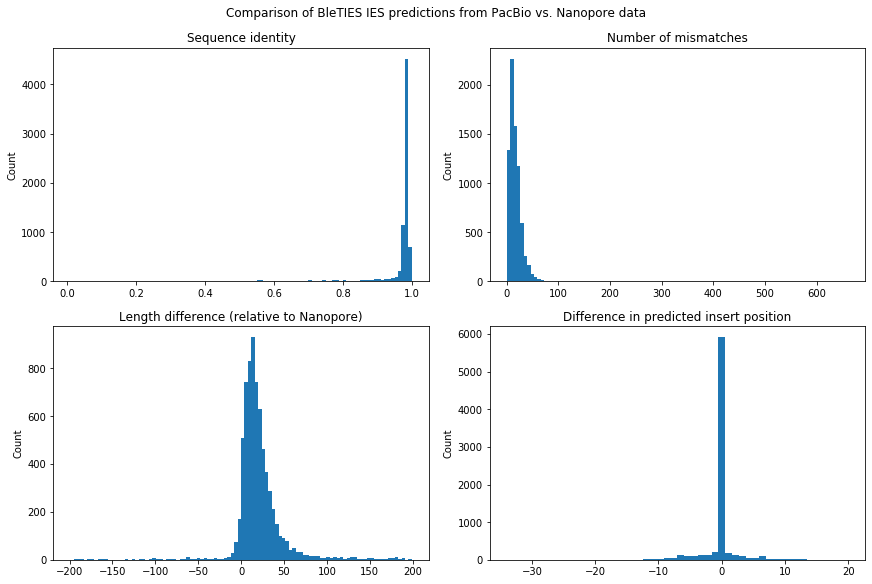

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(12,8), constrained_layout=True)
fig.suptitle("Comparison of BleTIES IES predictions from PacBio vs. Nanopore data")

axs[0][0].hist([i['pid'] for i in joint_stats], bins=[i/100 for i in range(1,101)])
axs[0][0].set_title("Sequence identity")
axs[0][0].set_ylabel("Count")

axs[0][1].hist([i['mm'] for i in joint_stats], bins=100)
axs[0][1].set_title("Number of mismatches")
axs[0][1].set_ylabel("Count")

axs[1][0].hist([i['indel'] for i in joint_stats if i['indel'] > -200 and i['indel'] < 200], bins=100)
axs[1][0].set_title("Length difference (relative to Nanopore)")
axs[1][0].set_ylabel("Count")

axs[1][1].hist([i['distdiff'] for i in joint_stats], bins=50)
axs[1][1].set_title("Difference in predicted insert position")
axs[1][1].set_ylabel("Count")

plt.savefig("plots/tthe_milraa_pb_vs_ont_ies_comparison.pdf")
plt.savefig("plots/tthe_milraa_pb_vs_ont_ies_comparison.png")

In [24]:
# Quantile summary for comparison of Pacbio and Nanopore MILRAA IESs
quants = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1.0]
pd.DataFrame(
    zip(quants,
        np.quantile(pd.DataFrame(joint_stats)['pid'], quants),
        np.quantile(pd.DataFrame(joint_stats)['indel'], quants),
        np.quantile(pd.DataFrame(joint_stats)['distdiff'], quants),
        np.quantile(pd.DataFrame(joint_stats)['distdiff'].apply(math.fabs), quants)),
    columns=['quantiles','pid','indel','distdiff','distdiff_abs']
)

,quantiles,pid,indel,distdiff,distdiff_abs
0,0.00,0.010811,-3514.00,-34.0,0.0
1,0.10,0.913733,1.00,-1.0,0.0
2,0.25,0.977907,8.00,0.0,0.0
3,0.50,0.983797,17.00,0.0,0.0
4,0.75,0.987308,30.00,0.0,0.0
5,0.90,0.989786,68.00,0.0,4.0
6,0.99,0.993784,1080.08,9.0,11.0
7,1.00,1.000000,3646.00,20.0,34.0


# Get coordinates of published IESs in latest MAC assembly

MAC assembly used for BleTIES predictions was published 2020, and MIC assembly from 2016, both available on ciliate.org. IESs are annotated in the MIC assembly, but a mapping of IES coordinates in the MAC reference is not available.

To compare our MILRAA IES predictions to the published IESs, we need to make our own mapping.

Procedure:

 * Extract flanking +/- 500 bp from each IES in the MIC assembly, and concatenate
 * Align these IES flanking regions against the MAC genome with blat
 * Pick the best scoring hit for each query:
   * If match is in one "block", and the block has length 1000, pick first tstart + 500 as coordinate
   * If match is in two "blocks", pick second tstart as IES coordinate
   * If match is in three or four blocks:
     * If first block is closer in length to 500 bp than last block, pick second tstart as coordinate
     * Else if last block is closer in length to 500 bp than first block, pick last tstart as coordinate

Because the IES excision is imprecise in Tetrahymena, the concatenated flanking regions of each IES would often align in two "blocks" in the MAC reference, because the excision boundary is not exactly the same each time so there is an indel relative to the reference.

In [25]:
# MIC reference genome and IES GFF
ies_gff = pbt.BedTool("ref/mic/mic.ies.gff")
mic_ref = SeqIO.to_dict(SeqIO.parse("ref/mic/2016_mic.genome.fasta", "fasta"))

In [26]:
# Get flanking 500 bp on either side of each IES in the MIC assembly
with open("ref/mic/ies_flanking_500bp.fasta", "w") as fh:
    for i in ies_gff:
        if re.match("IES", i.name):
            # Flanking 500 bp around the IES
            seg1 = mic_ref[i.chrom][i.start-500:i.start]
            seg2 = mic_ref[i.chrom][i.end:i.end+500]
            fh.write(">" + i.name + ".flank")
            fh.write("\n")
            fh.write(str(seg1.seq + seg2.seq))
            fh.write("\n")

In [27]:
# Write IES sequences
ies_seqs = []
for i in ies_gff:
    if re.match("IES", i.name):
        ies_seq = mic_ref[i.chrom][i.start:i.end]
        ies_seq.name = i.name
        ies_seq.id = i.name
        ies_seq.description = ""
        ies_seqs.append(ies_seq)
SeqIO.write(ies_seqs, "ref/mic/ies_seqs.fasta", "fasta")

7544

In [28]:
%%bash
grep -c '>' ref/mic/ies_flanking_500bp.fasta

7544


In [312]:
%%bash
# Align the IES flanks against the MAC reference to find corresponding
# coordinate for each IES in the MAC
blat ref/1-upd-Genome-assembly.fasta ref/mic/ies_flanking_500bp.fasta \
    -fastMap -minScore=500 ref/mic/ies_flanking_500bp.mac_asm.blat.psl

Loaded 103345795 letters in 181 sequences
Searched 7544000 bases in 7544 sequences


In [29]:
# Parse blat output and retain only best-scoring hit for each query
pslhdr = ['match', 'mismatch', 'repmatch', 'ns',
          'qgapcount', 'qgapbases', 'tgapcount', 'tgapbases','strand',
          'qname','qsize','qstart','qend',
          'tname','tsize','tstart','tend',
          'blockcount','blocksizes','qstarts','tstarts']
psldict = defaultdict(dict)
fh = open("ref/mic/ies_flanking_500bp.mac_asm.blat.psl", "r")
for i in range(5):
    fh.readline() # Strip header lines
for line in fh:
    spl = line.rstrip().split("\t")
    rec = dict(zip(pslhdr, spl))
    # Replace lower-scoring hit if already present
    if psldict[rec['qname']]:
        if int(rec['match']) > int(psldict[rec['qname']]['match']):
            psldict[rec['qname']] = rec
    else:
        psldict[rec['qname']] = rec

In [30]:
# Find IES coordinate in MAC based on the alignment blocks
# Also record the orientation of the MIC->MAC hit because the IES sequence will need to be 
# reverse complemented to match the orientation in the MAC reference
ies_mac_coords = []
edge_cases = []
for rec in list(psldict.values()):
    # Initialize/clear variable to hold coordinate
    coord = None
    blocks = [int(i) for i in rec['blocksizes'].rstrip(',').split(',')]
    tstarts = [int(i) for i in rec['tstarts'].rstrip(',').split(',')]
    # Calculate offset for queries that do not match along entire length (e.g. Ns)
    if rec['strand'] == '+':
        start_offset = int(rec['qstart'])
        end_offset = 1000 - int(rec['qend'])
    else:
        start_offset = 1000 - int(rec['qend'])
        end_offset = int(rec['qstart'])
    # Find the likely insert position based on mapped blocks:
    #
    # If aligns in a single block
    if len(blocks) == 1:
        # if block is total less than 10 bp from 1000 bp (including offsets)
        if 1000 - (blocks[0] + start_offset + end_offset) < 10:
            coord = tstarts[0] + (500 - start_offset)
        else:
            edge_cases.append(rec)
            #print("\t".join([rec[i] for i in ['strand','qstart','qend','qname','blocksizes','qstarts','tstarts']]))
    # If splits neatly into two blocks
    elif len(blocks) == 2:
        coord = tstarts[1]
    # If three or four blocks
    elif len(blocks) == 3 or len(blocks) == 4:
        # check if the first or last block is closer to 500 bp, and > 480 bp
        blocks[0] += start_offset
        blocks[2] += end_offset
        # last block is closer to 500 bp
        if (500 - blocks[-1]) <= (500 - blocks[0]) and (500 - blocks[-1]) < 20:
            coord = tstarts[-1]
        elif (500 - blocks[0]) < (500 - blocks[-1]) and (500 - blocks[0]) < 20:
            coord = tstarts[1]
        else:
            edge_cases.append(rec)
            #print("\t".join([rec[i] for i in ['strand','qstart','qend','qname','blocksizes','qstarts','tstarts']]))
    else:
        edge_cases.append(rec)
        #print("\t".join([rec[i] for i in ['strand','qstart','qend','qname','blocksizes','qstarts','tstarts']]))
    if coord:
        ies_mac_coords.append({'ies' : rec['qname'].split('.')[0],
                               'chrom' : rec['tname'],
                               'strand' : rec['strand'],
                               'coord' : coord})

In [31]:
# Write BED file of IES coordinates in the MAC genome
with open("ref/mic/ies_relative_to_mac.bed", "w") as fh:
    for i in ies_mac_coords:
        fh.write("\t".join([str(j) for j in [i['chrom'], i['coord'], i['coord'], i['ies']]]))
        fh.write("\n")

In [32]:
pd.DataFrame(ies_mac_coords).query('chrom=="chr_001"').sort_values('coord').head()

,ies,chrom,strand,coord
123,IES-00310-r17,chr_001,-,33898
122,IES-00311-r18,chr_001,-,44621
121,IES-00312-r11,chr_001,-,82108
120,IES-00313-r16,chr_001,-,91467
119,IES-00314-r16,chr_001,-,94128


In [33]:
print("Total number of published IES annotations in MIC genome:")
print(len(ies_gff) - 5) # first five features in GFF file are actually chromosome lengths
print("IESs with corresponding MAC coordinates identified")
print(len(ies_mac_coords))

Total number of published IES annotations in MIC genome:
7544
IESs with corresponding MAC coordinates identified
7468


In [34]:
# Find closest matching published IES to the MILRAA IESs
# (only MILRAA IESs with score > 0.1)
# ------------------------------------------------------
# Nanopore
annot_ies_ont_besthit = []
annot_ies_ont_nohit = []
for i in ies_mac_coords:
    if i['chrom'] in ont_pos_dict:
        hit = 0
        for x in range(i['coord'] - 10, i['coord'] + 10):
            if x in ont_pos_dict[i['chrom']]:
                distdiff = i['coord'] - x
                annot_ies_ont_besthit.append({'ont' : ont_pos_dict[i['chrom']][x],
                                              'ies_name' : i['ies'],
                                              'chrom' : i['chrom'],
                                              'ies_coord' : i['coord'],
                                              'strand' : i['strand'],
                                              'distdiff' : distdiff
                                             })
                hit += 1
        if hit == 0:
            annot_ies_ont_nohit.append(i)
# PacBio
annot_ies_pb_besthit = []
annot_ies_pb_nohit = []
for i in ies_mac_coords:
    if i['chrom'] in pb_pos_dict:
        hit = 0
        for x in range(i['coord'] - 10, i['coord'] + 10):
            if x in pb_pos_dict[i['chrom']]:
                distdiff = i['coord'] - x
                annot_ies_pb_besthit.append({'pb' : pb_pos_dict[i['chrom']][x],
                                              'ies_name' : i['ies'],
                                              'chrom' : i['chrom'],
                                              'ies_coord' : i['coord'],
                                              'strand' : i['strand'],
                                              'distdiff' : distdiff
                                             })
                hit += 1
        if hit == 0:
            annot_ies_pb_nohit.append(i)

In [35]:
pd.DataFrame(annot_ies_pb_nohit).query('chrom == "chr_001"').sort_values('coord').head()

,ies,chrom,strand,coord
35,IES-04342-r12,chr_001,-,208408
34,IES-04359-r15,chr_001,-,433256
33,IES-04363-r12,chr_001,-,467330
32,IES-04371-r14,chr_001,-,594645
31,IES-04377-r10,chr_001,-,660176


# Summary stats for published vs. MILRAA IESs

Eyeballing the existing annotated IESs that were not predicted by BleTIES, it appears that the mapper called these as clips rather than inserts. It is possible that the IESs were simply too long to be spanned by the reads, a limiting case for BleTIES, however MILCOR can be used to bin those reads out for separate assembly.

In [36]:
annot_ies_pb_nohit_list = [i['ies'] for i in annot_ies_pb_nohit]
annot_ies_ont_nohit_list = [i['ies'] for i in annot_ies_ont_nohit]
# Dicts mapping IES name in MIC annotation to best hit in BleTIES IES predictions
annot_ies_pb_besthit_dict = {i['ies_name'] : 
                                 {'pb_name' : i['pb'].name,
                                  'strand' : i['strand']} 
                             for i in annot_ies_pb_besthit}
annot_ies_ont_besthit_dict = {i['ies_name'] : 
                                 {'ont_name' : i['ont'].name,
                                  'strand' : i['strand']}
                              for i in annot_ies_ont_besthit}

In [37]:
annot_ies_pb_besthit[0]['pb'].name

'BREAK_POINTS_SUBREADS_chr_023_3325_3904'

In [38]:
# Gather stats from comparing MILRAA IESs to published IESs
annot_ies_stats = []
for i in ies_gff:
    if re.match("IES", i.name):
        annot_ies_stats.append({'ies' : i.name,
                                'chrom' : i.chrom,
                                'start' : int(i.start),
                                'end' : int(i.end),
                                'len' : int(i.end) - int(i.start),
                                'in_pb' : i.name in annot_ies_pb_besthit_dict,
                                'pb_name' : annot_ies_pb_besthit_dict[i.name]['pb_name'] if i.name in annot_ies_pb_besthit_dict else None,
                                'pb_strand' : annot_ies_pb_besthit_dict[i.name]['strand'] if i.name in annot_ies_pb_besthit_dict else None,
                                'in_ont' : i.name in annot_ies_ont_besthit_dict,
                                'ont_name' : annot_ies_ont_besthit_dict[i.name]['ont_name'] if i.name in annot_ies_ont_besthit_dict else None,
                                'ont_strand' : annot_ies_ont_besthit_dict[i.name]['strand'] if i.name in annot_ies_ont_besthit_dict else None
                               })

In [39]:
# Compare published IES sequences extracted from 2016 MIC assembly version
# to MILRAA reconstructions, pairwise alignment and %id etc.

# Long running step, if rerunning notebook load saved file instead

ies_seqs_dict = {i.id : i for i in ies_seqs}

for i in annot_ies_stats:
    if i['pb_name']:
        ies_seq = ies_seqs_dict[i['ies']]
        # Reverse complement MIC IES sequence if match on
        # MAC is on - strand
        if i['pb_strand'] == '-':
            ies_seq = ies_seq.reverse_complement()
        ies_pb_seq = pb_seq[i['pb_name']]
        alnscore = (pairwise2.align.globalxx(
            ies_seq.seq,
            ies_pb_seq.seq,
            score_only=True))
        i['pb_alnscore'] = alnscore
        i['pb_len'] = len(ies_pb_seq)
    else:
        i['pb_alnscore'] = None
        i['pb_len'] = None
    # Check for ONT IES
    if i['ont_name']:
        ies_seq = ies_seqs_dict[i['ies']]
        # Reverse complement MIC IES sequence if its match on
        # MAC is on - strand
        if i['ont_strand'] == '-':
            ies_seq = ies_seq.reverse_complement()
        ies_ont_seq = ont_seq[i['ont_name']]
        alnscore = (pairwise2.align.globalxx(
            ies_seq.seq,
            ies_ont_seq.seq,
            score_only=True))
        i['ont_alnscore'] = alnscore
        i['ont_len'] = len(ies_ont_seq)
    else:
        i['ont_alnscore'] = None
        i['ont_len'] = None

In [40]:
# Calculate percent ID, mismatch bp, and indel bp
for i in annot_ies_stats:
    if i['pb_alnscore']:
        i['pb_pid'] = i['pb_alnscore']/max([i['len'],i['pb_len']])
        i['pb_mm'] = i['len'] - i['pb_alnscore']
        i['pb_indel'] = i['pb_len'] - i['len']
    else:
        i['pb_pid'] = None
        i['pb_mm'] = None
        i['pb_indel'] = None
    if i['ont_alnscore']:
        i['ont_pid'] = i['ont_alnscore']/max([i['len'],i['ont_len']])
        i['ont_mm'] = i['len'] - i['ont_alnscore']
        i['ont_indel'] = i['ont_len'] - i['len']
    else:
        i['ont_pid'] = None
        i['ont_mm'] = None
        i['ont_indel'] = None

In [41]:
# Write to file to avoid recalculation if rerunning notebook
annot_ies_stats_df = pd.DataFrame(annot_ies_stats)
# Transform log2 lengths
annot_ies_stats_df['log2_len'] = annot_ies_stats_df['len'].apply(math.log2)
annot_ies_stats_df.to_csv("tthe_published_vs_milraa_ies.tsv", sep="\t", index=False)

In [42]:
ont_ies_annot_nohit = [rec for rec in ont_stats 
                       if rec['id'] not in set([i['ont'].name for i in annot_ies_ont_besthit]) 
                       and rec['score'] > 0.1]

In [43]:
pb_ies_annot_nohit = [rec for rec in pb_stats 
                      if rec['id'] not in set([i['pb'].name for i in annot_ies_pb_besthit])
                      and rec['score'] > 0.1]

In [44]:
print(f"""
NB: MILRAA IESs counting only those with score > 0.1

PacBio:
Total MILRAA IESs predicted: {str(len(pb_stats))}
MILRAA IESs with retention score >0.1: {str(len([i for i in pb_stats if i['score'] > 0.1]))}
MILRAA IESs with published IESs within 10 bp: {str(len(set([i['pb'].name for i in annot_ies_pb_besthit])))}
MILRAA IESs no published IES within 10 bp: {str(len(pb_ies_annot_nohit))}
Published IESs with MILRAA IES within 10 bp: {str(len(annot_ies_pb_besthit_dict))}
Published IESs with no MILRAA IES within 10 bp: {str(len(annot_ies_pb_nohit))}

Nanopore
Total MILRAA IESs predicted: {str(len(ont_stats))}
MILRAA IESs with retention score >0.1: {str(len([i for i in ont_stats if i['score'] > 0.1]))}
MILRAA IESs with published IESs within 10 bp: {str(len(set([i['ont'].name for i in annot_ies_ont_besthit])))}
MILRAA IESs no published IES within 10 bp: {str(len(ont_ies_annot_nohit))}
Published IESs with MILRAA IES within 10 bp: {str(len(annot_ies_ont_besthit_dict))}
Published IESs with no MILRAA IES within 10 bp: {str(len(annot_ies_ont_nohit))}
""")


NB: MILRAA IESs counting only those with score > 0.1

PacBio:
Total MILRAA IESs predicted: 8459
MILRAA IESs with retention score >0.1: 7930
MILRAA IESs with published IESs within 10 bp: 5105
MILRAA IESs no published IES within 10 bp: 2825
Published IESs with MILRAA IES within 10 bp: 5105
Published IESs with no MILRAA IES within 10 bp: 2363

Nanopore
Total MILRAA IESs predicted: 8237
MILRAA IESs with retention score >0.1: 7928
MILRAA IESs with published IESs within 10 bp: 5064
MILRAA IESs no published IES within 10 bp: 2864
Published IESs with MILRAA IES within 10 bp: 5056
Published IESs with no MILRAA IES within 10 bp: 2412



In [58]:
# Nanopore predictions have two numbers that do not match up:
# MILRAA IESs with published IESs within 10 bp: 5064
# Published IESs with MILRAA IES within 10 bp: 5056

# Check which published IES has more than one MILRAA IES in the vicinity
check_dups_ont = defaultdict(list)
for i in annot_ies_ont_besthit:
    check_dups_ont[i['ies_name']].append(i['ont'].name)
dupslist = []
for i in check_dups_ont:
    if len(check_dups_ont[i]) > 1:
        dupslist.append(i)

In [92]:
len(dupslist)

8

In [68]:
[[i, i['ont'].name] for i in annot_ies_ont_besthit if i['ies_name'] in dupslist]

[[{'ont': Interval(chr_025:240877-240878),
   'ies_name': 'IES-00550-r15',
   'chrom': 'chr_025',
   'ies_coord': 240881,
   'strand': '-',
   'distdiff': 4},
  'BREAK_POINTS_SUBREADS_chr_025_240878_918'],
 [{'ont': Interval(chr_025:240887-240888),
   'ies_name': 'IES-00550-r15',
   'chrom': 'chr_025',
   'ies_coord': 240881,
   'strand': '-',
   'distdiff': -6},
  'BREAK_POINTS_SUBREADS_chr_025_240888_1334'],
 [{'ont': Interval(chr_068:396228-396229),
   'ies_name': 'IES-03651-r18',
   'chrom': 'chr_068',
   'ies_coord': 396229,
   'strand': '-',
   'distdiff': 1},
  'BREAK_POINTS_SUBREADS_chr_068_396229_2514'],
 [{'ont': Interval(chr_068:396234-396235),
   'ies_name': 'IES-03651-r18',
   'chrom': 'chr_068',
   'ies_coord': 396229,
   'strand': '-',
   'distdiff': -5},
  'BREAK_POINTS_SUBREADS_chr_068_396235_2514'],
 [{'ont': Interval(chr_071:444112-444113),
   'ies_name': 'IES-03404-r5',
   'chrom': 'chr_071',
   'ies_coord': 444120,
   'strand': '+',
   'distdiff': 8},
  'BREAK_POIN

## Lengths of published vs. MILRAA IESs

We hypothesize that longer IESs (>10 kbp) may not be assembled well by MILRAA because the reads are not sufficient to span them.

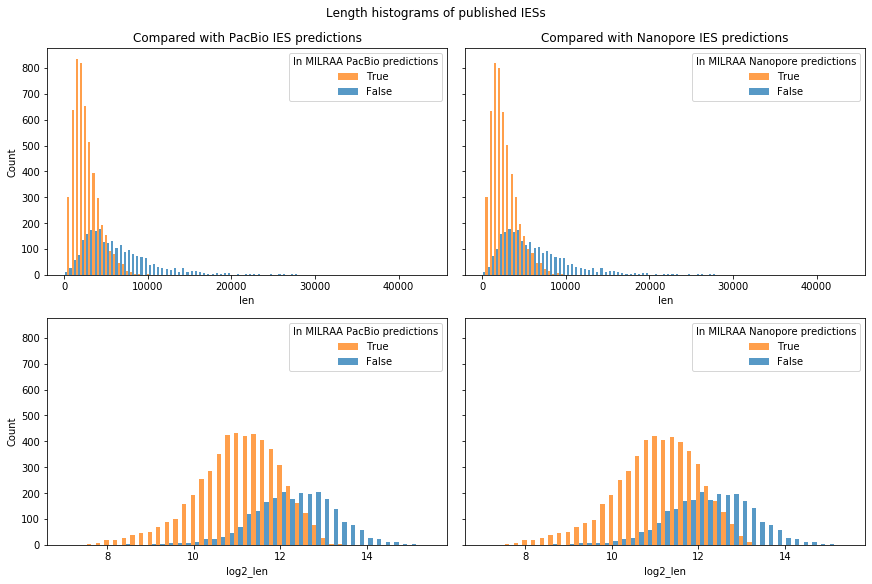

In [69]:
fig, axs = plt.subplots(2,2, figsize=(12,8), constrained_layout=True, sharey=True)

fig.suptitle("Length histograms of published IESs")

p1 = sns.histplot(data=annot_ies_stats_df,
                 x='len', hue='in_pb', multiple='dodge',
                 binwidth=500, linewidth=0,
                 ax=axs[0][0])
p1.set_title("Compared with PacBio IES predictions")
p1.legend(title = "In MILRAA PacBio predictions", labels=['True','False'])

p2 = sns.histplot(data=annot_ies_stats_df,
                  x='len', hue='in_ont', multiple='dodge',
                  binwidth=500, linewidth=0,
                  ax=axs[0][1])
p2.set_title("Compared with Nanopore IES predictions")
p2.legend(title = "In MILRAA Nanopore predictions", labels=['True','False'])

# Log scaled
p3 = sns.histplot(data=annot_ies_stats_df,
                  x='log2_len', hue='in_pb', multiple='dodge',
                  binwidth=0.2, linewidth=0,
                  ax=axs[1][0])
p3.legend(title = "In MILRAA PacBio predictions", labels=['True','False'])

p4 = sns.histplot(data=annot_ies_stats_df,
                  x='log2_len', hue='in_ont', multiple='dodge',
                  binwidth=0.2, linewidth=0,
                  ax=axs[1][1])
p4.legend(title = "In MILRAA Nanopore predictions", labels=['True','False'])

plt.savefig("plots/tthe_milraa_vs_published_ies_len_histograms.pdf")
plt.savefig("plots/tthe_milraa_vs_published_ies_len_histograms.png")

In [70]:
# Quantile summary for lengths of published IESs predicted vs. not predicted by MILRAA
quants = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1.0]
pd.DataFrame(
    zip(quants,
        np.quantile(annot_ies_stats_df.query('in_ont')['len'],quants),
        np.quantile(annot_ies_stats_df.query('not in_ont')['len'],quants),
        np.quantile(annot_ies_stats_df.query('in_pb')['len'],quants),
        np.quantile(annot_ies_stats_df.query('not in_pb')['len'],quants),
       ),
    columns=['quantiles',
             'len_ont','len_notont',
             'len_pb','len_notpb']
)
    

,quantiles,len_ont,len_notont,len_pb,len_notpb
0,0.00,131.00,388.00,131.00,352.00
1,0.10,832.00,2230.00,833.70,2434.00
2,0.25,1330.50,3363.00,1334.75,3547.75
3,0.50,2113.00,5330.00,2095.00,5564.00
4,0.75,3265.50,8351.00,3204.00,8453.75
5,0.90,4553.60,12004.80,4483.20,12108.00
6,0.99,7144.42,22999.04,6993.62,23020.60
7,1.00,9860.00,43428.00,9860.00,43428.00


In [71]:
annot_ies_stats_df.head()

,ies,chrom,start,end,len,in_pb,pb_name,pb_strand,in_ont,ont_name,...,pb_len,ont_alnscore,ont_len,pb_pid,pb_mm,pb_indel,ont_pid,ont_mm,ont_indel,log2_len
0,IES-04625-r7,chr1,29183,32709,3526,False,None,None,False,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.783817
1,IES-04624-r11,chr1,62448,66339,3891,True,BREAK_POINTS_SUBREADS_chr_023_3325_3904,-,True,BREAK_POINTS_SUBREADS_chr_023_3325_3864,...,3904.0,3845.0,3864.0,0.993084,14.0,13.0,0.988178,46.0,-27.0,11.925925
2,IES-05548-r12,chr1,100522,102612,2090,True,BREAK_POINTS_SUBREADS_chr_001_1449001_2036,-,False,None,...,2036.0,NaN,NaN,0.950239,104.0,-54.0,NaN,NaN,NaN,11.029287
3,IES-05549-r13,chr1,110531,115929,5398,True,BREAK_POINTS_SUBREADS_chr_001_1444281_5313,-,True,BREAK_POINTS_SUBREADS_chr_001_1444281_5280,...,5313.0,5260.0,5280.0,0.979807,109.0,-85.0,0.974435,138.0,-118.0,12.398209
4,IES-05550-r10,chr1,122262,126432,4170,True,BREAK_POINTS_SUBREADS_chr_001_1437950_4172,-,True,BREAK_POINTS_SUBREADS_chr_001_1437950_4158,...,4172.0,4133.0,4158.0,0.997363,9.0,2.0,0.991127,37.0,-12.0,12.025832


In [72]:
# Quantile summary for lengths of published IESs predicted vs. not predicted by MILRAA
quants = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1.0]
pd.DataFrame(
    zip(quants,
        np.quantile(annot_ies_stats_df['len'],quants)
       ),
    columns=['quantiles',
             'len']
)
    

,quantiles,len
0,0.00,131.00
1,0.10,996.30
2,0.25,1638.75
3,0.50,2775.00
4,0.75,4673.00
5,0.90,7746.00
6,0.99,16976.50
7,1.00,43428.00


## Retention scores of published vs. MILRAA IESs

We compare the retention scores and lengths of MILRAA IESs that are not present in the published set, to those that are, to evaluate whether they are likely to be artefacts. If they are artefacts we expect them to have lower scores and be shorter. We already applied a score cutoff, discarding MILRAA IESs with scores <0.1.

In [73]:
ont_stats_overcutoff = [rec for rec in ont_stats if rec['score'] > 0.1]
for rec in ont_stats_overcutoff:
    if rec['id'] in [i['ont_name'] for i in annot_ies_stats]:
        rec['in_pub'] = True
    else:
        rec['in_pub'] = False

In [74]:
pb_stats_overcutoff = [rec for rec in pb_stats if rec['score'] > 0.1]
for rec in pb_stats_overcutoff:
    if rec['id'] in [i['pb_name'] for i in annot_ies_stats]:
        rec['in_pub'] = True
    else:
        rec['in_pub'] = False

In [75]:
len(pb_stats_overcutoff)

7930

In [76]:
sum([i['in_pub'] for i in ont_stats_overcutoff])

5056

In [77]:
sum([i['in_pub'] for i in pb_stats_overcutoff])

5105

In [79]:
ont_stats_overcutoff[0]

{'id': 'BREAK_POINTS_SUBREADS_chr_001_7588_2399',
 'score': 0.3504,
 'len': 2399,
 'iescov': 41,
 'in_pub': False}

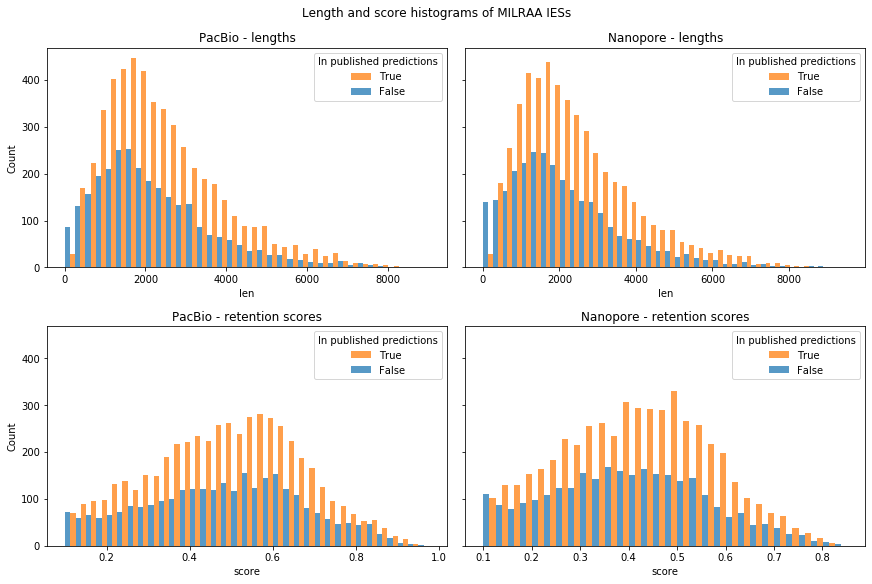

In [80]:
fig, axs = plt.subplots(2,2, figsize=(12,8), constrained_layout=True, sharey=True)

fig.suptitle("Length and score histograms of MILRAA IESs")

p1 = sns.histplot(data=pd.DataFrame(pb_stats_overcutoff),
                 x='len', hue='in_pub', multiple='dodge',
                 binwidth=250, linewidth=0,
                 ax=axs[0][0])
p1.set_title("PacBio - lengths")
p1.legend(title = "In published predictions", labels=['True','False'])

p2 = sns.histplot(data=pd.DataFrame(ont_stats_overcutoff),
                  x='len', hue='in_pub', multiple='dodge',
                  binwidth=250, linewidth=0,
                  ax=axs[0][1])
p2.set_title("Nanopore - lengths")
p2.legend(title = "In published predictions", labels=['True','False'])

# Log scaled
p3 = sns.histplot(data=pd.DataFrame(pb_stats_overcutoff),
                  x='score', hue='in_pub', multiple='dodge',
                  binwidth=0.025, linewidth=0,
                  ax=axs[1][0])
p3.set_title("PacBio - retention scores")
p3.legend(title = "In published predictions", labels=['True','False'])

p4 = sns.histplot(data=pd.DataFrame(ont_stats_overcutoff),
                  x='score', hue='in_pub', multiple='dodge',
                  binwidth=0.025, linewidth=0,
                  ax=axs[1][1])
p4.set_title("Nanopore - retention scores")
p4.legend(title = "In published predictions", labels=['True','False'])

plt.show()

In [81]:
# Quantile summary for lengths and scores of MILRAA IESs overlapping vs. not overlapping with published set
quants = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1.0]
pd.DataFrame(
    zip(quants,
        np.quantile(pd.DataFrame(pb_stats_overcutoff).query('in_pub')['len'],quants),
        np.quantile(pd.DataFrame(pb_stats_overcutoff).query('not in_pub')['len'],quants),
        np.quantile(pd.DataFrame(ont_stats_overcutoff).query('in_pub')['len'],quants),
        np.quantile(pd.DataFrame(ont_stats_overcutoff).query('not in_pub')['len'],quants),
        np.quantile(pd.DataFrame(pb_stats_overcutoff).query('in_pub')['score'],quants),
        np.quantile(pd.DataFrame(pb_stats_overcutoff).query('not in_pub')['score'],quants),
        np.quantile(pd.DataFrame(ont_stats_overcutoff).query('in_pub')['score'],quants),
        np.quantile(pd.DataFrame(ont_stats_overcutoff).query('not in_pub')['score'],quants),
       ),
    columns=['quantiles',
             'pb_len_inpub','pb_len_notpub','ont_len_inpub','ont_len_notinpub',
             'pb_score_inpub','pb_score_notpub','ont_score_inpub','ont_score_notinpub']
)
    

,quantiles,pb_len_inpub,pb_len_notpub,ont_len_inpub,ont_len_notinpub,pb_score_inpub,pb_score_notpub,ont_score_inpub,ont_score_notinpub
0,0.00,102.0,15.0,133.00,15.00,0.100800,0.10070,0.10070,0.100600
1,0.10,835.4,621.8,803.00,525.00,0.232040,0.20924,0.20000,0.177120
2,0.25,1331.0,1162.0,1287.00,1096.50,0.355900,0.34310,0.29660,0.279375
3,0.50,2082.0,1906.0,2058.00,1846.00,0.492500,0.49310,0.41410,0.400000
4,0.75,3161.0,2994.0,3148.00,2919.25,0.609600,0.62120,0.52210,0.516600
5,0.90,4426.4,4245.6,4439.00,4171.90,0.710020,0.73080,0.60835,0.618070
6,0.99,6737.0,6939.4,6854.45,6956.00,0.866196,0.87196,0.75081,0.768419
7,1.00,8955.0,8600.0,9316.00,8979.00,0.935700,0.96850,0.82190,0.840900


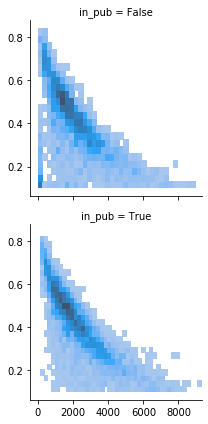

In [82]:
g = sns.FacetGrid(data=pd.DataFrame(ont_stats_overcutoff), row='in_pub')
g.map_dataframe(sns.histplot, x='len', y='score')

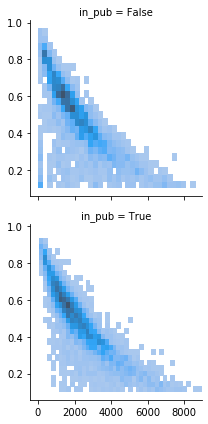

In [83]:
g = sns.FacetGrid(data=pd.DataFrame(pb_stats_overcutoff), row='in_pub')
g.map_dataframe(sns.histplot, x='len', y='score')

## Sequence comparisons between MILRAA and published IESs

How well does the MILRAA reconstruction work? For this we compare the sequences.

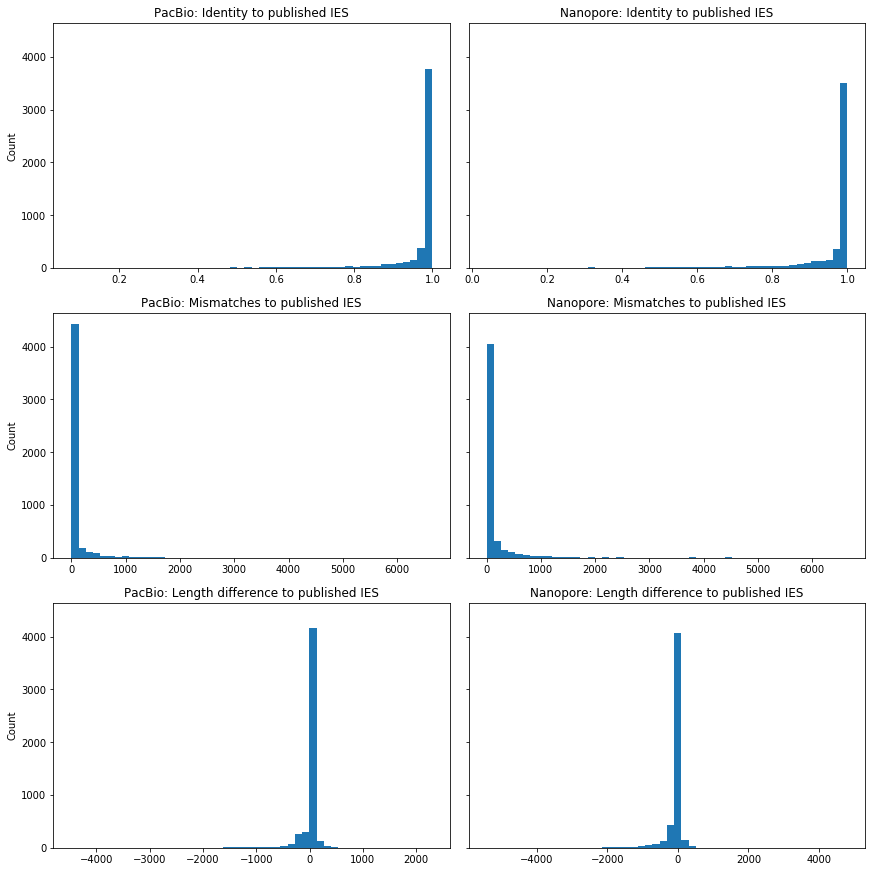

In [84]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,12), sharey=True, constrained_layout=True)

# Percent ID
axs[0][0].hist(annot_ies_stats_df['pb_pid'].dropna(), bins=50)
axs[0][0].set_title("PacBio: Identity to published IES")
axs[0][0].set_ylabel("Count")

axs[0][1].hist(annot_ies_stats_df['ont_pid'].dropna(), bins=50)
axs[0][1].set_title("Nanopore: Identity to published IES")

# Mismatches
axs[1][0].hist(annot_ies_stats_df['pb_mm'].dropna(), bins=50)
axs[1][0].set_title("PacBio: Mismatches to published IES")
axs[1][0].set_ylabel("Count")

axs[1][1].hist(annot_ies_stats_df['ont_mm'].dropna(), bins=50)
axs[1][1].set_title("Nanopore: Mismatches to published IES")

# Indels
axs[2][0].hist(annot_ies_stats_df['pb_indel'].dropna(), bins=50)
axs[2][0].set_title("PacBio: Length difference to published IES")
axs[2][0].set_ylabel("Count")

axs[2][1].hist(annot_ies_stats_df['ont_indel'].dropna(), bins=50)
axs[2][1].set_title("Nanopore: Length difference to published IES")

plt.savefig("plots/tthe_milraa_vs_published_ies_seq_comparisons.pdf")
plt.savefig("plots/tthe_milraa_vs_published_ies_seq_comparisons.png")

In [85]:
quants

[0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1.0]

In [86]:
# Quantile summary for sequence comparison of published vs. MILRAA IESs
quants = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1.0]
pd.DataFrame(
    zip(quants,
        np.quantile(annot_ies_stats_df.query('in_pb')['pb_pid'],quants),
        np.quantile(annot_ies_stats_df.query('in_pb')['pb_mm'],quants),
        np.quantile(annot_ies_stats_df.query('in_pb')['pb_indel'],quants),
        np.quantile(annot_ies_stats_df.query('in_pb')['pb_indel'].apply(math.fabs),quants),
        np.quantile(annot_ies_stats_df.query('in_ont')['ont_pid'],quants),
        np.quantile(annot_ies_stats_df.query('in_ont')['ont_mm'],quants),
        np.quantile(annot_ies_stats_df.query('in_ont')['ont_indel'],quants),
        np.quantile(annot_ies_stats_df.query('in_ont')['ont_indel'].apply(math.fabs),quants),),
    columns=['quantiles',
             'pb_pid','pb_mm','pb_indel','pb_indel_abs',
             'ont_pid','ont_mm','ont_indel','ont_indel_abs',
             ]
)
    

,quantiles,pb_pid,pb_mm,pb_indel,pb_indel_abs,ont_pid,ont_mm,ont_indel,ont_indel_abs
0,0.00,0.077024,0.00,-4472.0,0.00,0.037930,0.00,-5428.00,0.00
1,0.10,0.886909,2.00,-119.3,3.00,0.820501,8.00,-218.00,2.00
2,0.25,0.979259,4.00,3.0,7.00,0.965934,14.00,-23.00,5.00
3,0.50,0.989873,8.00,9.0,13.00,0.987596,24.00,-8.00,11.00
4,0.75,0.993222,15.00,16.0,27.00,0.990872,64.00,0.00,39.00
5,0.90,0.994878,251.60,29.0,172.00,0.992802,436.20,11.00,251.40
6,0.99,0.997125,2473.23,292.3,1186.74,0.995312,3086.24,273.78,1470.78
7,1.00,0.998667,6640.00,2296.0,4472.00,0.999219,6643.00,4803.00,5428.00


# Software timing

In [87]:
# Sum up total processing time for PacBio data
starttimes = []
finishtimes = []
for logfile in glob.glob('bleties_pb/logs/*.log'):
    with open(logfile, "r") as fh:
        for line in fh:
            started = re.search(r"\[(\S+ \d{2}:\d{2}:\d{2}\,\d{3})\] .* Started BleTIES MILRAA", line)
            finished = re.search(r"\[(\S+ \d{2}:\d{2}:\d{2}\,\d{3})\] .* Finished MILRAA", line)
            if started:
                starttime = datetime.datetime.fromisoformat(started.group(1).replace(' ','T').replace(',', '.'))
                starttimes.append(starttime)
            elif re.search(r"Finished", line):
                finishtime = datetime.datetime.fromisoformat(finished.group(1).replace(' ','T').replace(',', '.'))
                finishtimes.append(finishtime)
pb_totaltime = datetime.timedelta(0)
# Have to add in a roundabout way because list sum doesn't work
timings = [i[1] - i[0] for i in zip(starttimes, finishtimes)]
for i in timings:
    pb_totaltime += i

In [88]:
# Sum up total processing time for Nanopore data
starttimes = []
finishtimes = []
for logfile in glob.glob('bleties_ont/logs/*.log'):
    with open(logfile, "r") as fh:
        for line in fh:
            started = re.search(r"\[(\S+ \d{2}:\d{2}:\d{2}\,\d{3})\] .* Started BleTIES MILRAA", line)
            finished = re.search(r"\[(\S+ \d{2}:\d{2}:\d{2}\,\d{3})\] .* Finished MILRAA", line)
            if started:
                starttime = datetime.datetime.fromisoformat(started.group(1).replace(' ','T').replace(',', '.'))
                starttimes.append(starttime)
            elif re.search(r"Finished", line):
                finishtime = datetime.datetime.fromisoformat(finished.group(1).replace(' ','T').replace(',', '.'))
                finishtimes.append(finishtime)
ont_totaltime = datetime.timedelta(0)
# Have to add in a roundabout way because list sum doesn't work
timings = [i[1] - i[0] for i in zip(starttimes, finishtimes)]
for i in timings:
    ont_totaltime += i

In [89]:
print("Total wall clock time, PacBio dataset:")
print(pb_totaltime)
print("Total wall clock time, Nanopore dataset:")
print(ont_totaltime)

Total wall clock time, PacBio dataset:
1 day, 2:43:41.485000
Total wall clock time, Nanopore dataset:
21:27:39.232000
